In [530]:
#TODO CHANGE ALL THE PYTHON SCRIPTS TO PYTHON NOTEBOOK, COPY PASTE AND MAKE NEW PYTHON SCIRPTS AND SAVE AS .IPYNB

# PART A: STATE A MODEL (DIFFERENTIAL EQUATION) FOR THE [] OF A IN REACTOR 1 AND FOR REACTOR 2
# WE USE deqn1 and deqn2 for this, recall the mass balance:
# Accumulated = -generated + flow in - flow out


from sympy import *
from IPython.display import display,Math,Markdown

t,f, Corg, V1, V2, k = symbols('t,f, Corg, V1, V2, k', positive=True)
Corg1, Corg2 = symbols('Corg1','Corg2',cls=Function) # concentration of organic substance in tank I and II which are the unknowns

deqn1 = Eq(V1*diff(Corg1(t),t), - k*Corg(t)*V1 - f*Corg1(t)) # A mass balance tank I
deqn2 = Eq(V2*diff(Corg2(t),t), - k*Corg(t)*V2 - f*(Corg2(t)-Corg1(t))) # A mass balance tank II

print ("here are the equations:")
display ("reactor1:",deqn1)
display ("reactor2:",deqn2) 
 
#PART B: FIND SYMBOLIC EXPRESSIONS FOR THE STEADY STATE [] IN BOTH REACTORS, NOT SOLVING DEQN
#AND FIND NUMBER OF NUMERICAL VALUES USING THE PARAMETERS IN TABLE 1
#
#init_conditions= {CA1(0):0,CA2(0):0} # initial value of concentration.we are told to assume zero
#par = [(f,20),(CA0, 2),(V1,200),(V2,100),(k,0.048)] #taken from equation 
#
#symbolic_solution = dsolve((deqn1,deqn2), ics=init_conditions)
#display(Markdown('Symbolic solution is:'), symbolic_solution[0],symbolic_solution[1])
#
#"""Using the parameters"""
#
#C_A1sol=symbolic_solution[0].rhs.subs(par)
#C_A2sol=symbolic_solution[1].rhs.subs(par)
#
#graphs = plot(C_A1sol,C_A2sol,(t,0,60),legend=True,show=False)
#graphs[0].label = 'c1(t)'
#graphs[1].label = 'c2(t)'
#graphs.title = 'Concentration of A vs time'
#graphs.show()

TypeError: symbols() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

11A example for Buoancy

In [ ]:
from sympy import*
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns

m, D, g, t, m_displaced_liquid, rho_s, rho_l  = symbols("m, D, g, t, m_displaced_liquid, rho_s, rho_l",positive=True)
h = symbols('h',cls=Function) 

''' RECALL:
 position = h(t)
 velocity = v(t) = dh/dt
 acceleration = a(t) = dv/dt = d^2h/dt^2'''

# because of this ^ we differentiate v in terms of h and t
v = diff(h(t),t)

''' Our defined force balance:
(d(h),t,2) = (F_up, - F_drag - F_gravity)/m

becuase we have Forces that do not equal a value
but are a calculation, we must define these'''

# since we introduce the m_displaced liquid, we need to calculate for this too:
m_displaced_liquid = m/rho_s*rho_l

# Summation of Forces:
F_up = g*m_displaced_liquid
F_gravity = g *m # m/s**-2
F_drag = D*v

# Now we can put these into our final differential equation
deq_object_rising_liquid = Eq(diff(h(t),t,2),((F_up - F_drag - F_gravity)/m)) # this is a double differentiated eqn
print('this is the differential equation')
display (deq_object_rising_liquid)


this is the differential equation


Eq(Derivative(h(t), (t, 2)), (-D*Derivative(h(t), t) + g*m*rho_l/rho_s - g*m)/m)

In [ ]:
params = {
    (m,50E-3), #exponential from scientific notation in kg
    (D,1.40), # kg/s
    (rho_s, 900),# kg/m**3
    (rho_l, 1000), # kg/m**3
    (g, 9.80) # m/s**2
}

init_cond = {h(0):0, v.subs(t,0):0}

print ('this is the symbolic solution:')
symb_sol = dsolve(deq_object_rising_liquid.subs(params))
display(symb_sol)

print ('this is the numerical solution_:')
num_sol = dsolve(deq_object_rising_liquid.subs(params), ics=init_cond)
display(num_sol)

print ('this is the analytical solution:')
anal_sol = dsolve(deq_object_rising_liquid)
display(anal_sol)


this is the symbolic solution:


Eq(h(t), C1 + C2*exp(-28.0*t) + 0.0388888888888889*t)

this is the numerical solution_:


Eq(h(t), 0.0388888888888889*t - 0.00138888888888889 + 0.00138888888888889*exp(-28.0*t))

this is the analytical solution:


Eq(h(t), C1 + C2*exp(-D*t/m) + g*m*rho_l*t/(D*rho_s) - g*m*t/D)

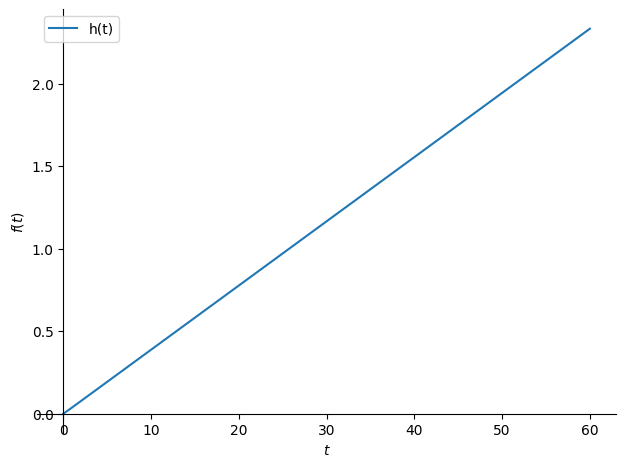

In [ ]:
# now we will plot :)
sol = dsolve(deq_object_rising_liquid.subs(params), ics=init_cond)
graph = plot(sol.rhs, (t, 0, 60), line_colour='blue',label='h(t)', legend=True, show=False)
graph.show()

In [ ]:
# estimate the time it takes for object to reach top of liquid, 2m
display(num_sol.rhs)
time = nsolve(Eq(num_sol.rhs,2),t,1)
print('this is the time is takes for the object to reach the top at 2m:')
display(time)

#time = nsolve(num_sol.rhs, 2,t,1) Where rhs we want it to be 2, t is the variable we are solving for, 1 is a starting guess


#estimate max velocity  of dh/dt 
velocity = diff(num_sol.rhs,t)
max_velocity = velocity.subs(t, time).evalf(3)
print('this is the max velocity',max_velocity,'m/s^2')





0.0388888888888889*t - 0.00138888888888889 + 0.00138888888888889*exp(-28.0*t)

this is the time is takes for the object to reach the top at 2m:


51.4642857142857

this is the max velocity 0.0389 m/s^2


Mixing Tank Example

In [ ]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns

'''don't get thrown off at the fact that there are 2 streams, we focus on the  [] of component that is not water 
    we keep in mind the mass frac of each 
    it is clear we are missing V in this example '''

# now we will define the symbols used, include anything except the thing that is in d/dt
t, w1, w3, v, rho, m, x1  = symbols("t, w1, w3, v, rho, m, x1",positive=True) 

''' here x1/x2 is the concentration of NaOH at stream in/out'''

# define Cp as a function which is the differential equation
x3 = symbols('x3',cls=Function) 

deqnmix = Eq(m*diff(x3(t),t), (w1*x1)-(w3*x3(t)))
display(deqnmix)


Eq(m*Derivative(x3(t), t), w1*x1 - w3*x3(t))

In [ ]:
params = {
    (x1,0.67), #kg/min, original is 0.75 but step change occurs to become o.67
    (w1,20), #kg/min
    (w3, 27.273), #kg/min
    (m,rho*v), #mass in kg
    (v, 0.2845), #volume of liquid , given L
    (rho, 1200) #density of liquid, given kg/m**3
}

init_cond = {x3(0):0.55}

print ('this is the symbolic solution:')
symb_sol = dsolve(deqnmix.subs(params))
display(symb_sol)

print ('this is the numerical solution_:')
num_sol = dsolve(deqnmix.subs(params), ics=init_cond)
display(num_sol)

print ('this is the analytical solution:')
anal_sol = dsolve(deqnmix)
display(anal_sol)


this is the symbolic solution:


Eq(x3(t), C1*exp(-0.0798857644991213*t) + 0.491328420049133)

this is the numerical solution_:


Eq(x3(t), 0.491328420049133 + 0.058671579950867*exp(-0.0798857644991213*t))

this is the analytical solution:


Eq(x3(t), C1*exp(-t*w3/m) + w1*x1/w3)

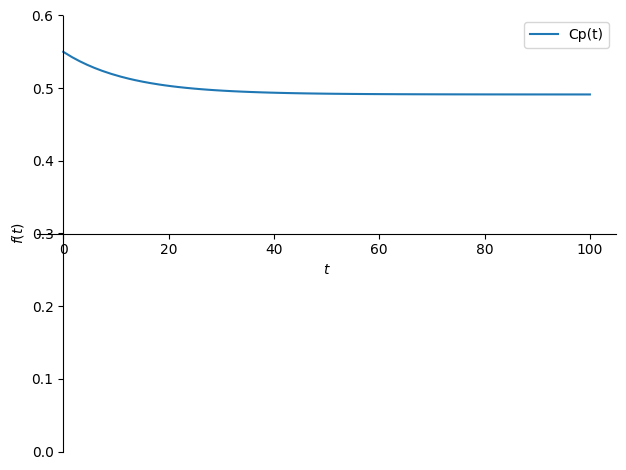

In [ ]:
# now we will plot :)
sol = dsolve(deqnmix.subs(params), ics=init_cond)
graph = plot(sol.rhs, (t, 0, 100), ylim = (0, 0.6), line_colour='blue',label='Cp(t)', legend=True, show=False)
graph.show()



Chemical Systems: Dilution

In [ ]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns


# now we will define the symbols used, include anything except the thing that is in d/dt
t, f, rho, v  = symbols("t, f, rho, v",positive=True) 

# define Cp as a function which is the differential equation
CA = symbols('CA',cls=Function) 

deqndilute = Eq(v*diff(CA(t),t), -f*CA(t))
display(deqndilute)



Eq(v*Derivative(CA(t), t), -f*CA(t))

In [ ]:
#now we solve based on given info:
#initial conditions= yes 
#params = yes 
#therefore it is numeric

init_condit1 = {CA(0):0.0227} # initial value of the concentration 
par = [(f,40000),(rho,1000),(v, 440000)] # parameters, substitute the values given

# now we ask python to solve it for us :)
numeric_sol = dsolve(deqndilute.subs(par),ics=init_condit1) 
print( 'numeric solution:')
numeric_sol

numeric solution:


Eq(CA(t), 0.0227*exp(-t/11))

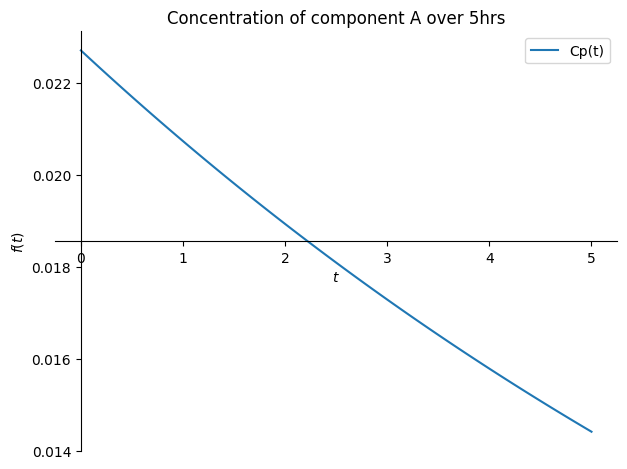

In [ ]:
# now we plot over 5hr interval
solution = numeric_sol.rhs.subs(par) 

graphs = plot(solution,(t,0,5),line_colour='blue',label='Cp(t)', legend=True, show=False)

graphs.title = 'Concentration of component A over 5hrs'
graphs.show()

In [ ]:
#evaluate concentration of A after 5 hours 

concentration = solution.evalf(subs={t:5})
concentration

0.0144085167099444

Based on this we can say that it is a realistic graph 

Exam June 2024, 1.3

In [ ]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns


# now we will define the symbols used, include anything except the thing that is in d/dt
t,k,f,V1,Cg  = symbols("t,k,f,V1,Cg",positive=True) 

# define Cp as a function which is the differential equation
Cp = symbols('C_p',cls=Function) 


In [ ]:
#now we will define the first differential equation
# REMEMBER left side of equation (= is ,) and right side 
deqn1 = Eq(diff(Cp(t),t),k*Cg-f*Cp(t)/V1) # remember that Cp is a function of time so write (t)

print('this is the differential equation that will be solved:')
deqn1

this is the differential equation that will be solved:


Eq(Derivative(C_p(t), t), Cg*k - f*C_p(t)/V1)

In [ ]:
# now we will solve for symbolic solution = wiht initial params and conditions
''
init_condit1 = {Cp(0):0} # initial value of the concentration 
par = [(f,1.2),(Cg,0.67),(V1,15),(k,0.4)] # parameters, substitute the values given

# now we ask python to solve it for us :)
symb_sol = dsolve((deqn1),ics=init_condit1) 
print( 'symbolic solution:')
symb_sol

symbolic solution:


Eq(C_p(t), Cg*V1*k/f - Cg*V1*k*exp(-f*t/V1)/f)

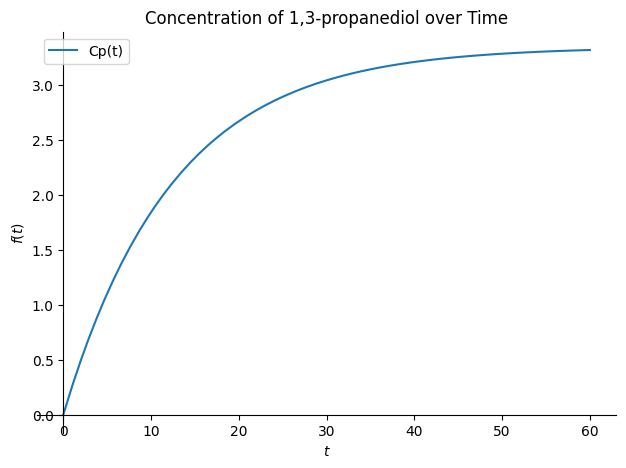

In [ ]:
# to provide a figure over a given amount of time:
''
# extracting the original solution with the same parameters
solution = symb_sol.rhs.subs(par) 

#plotting
graphs = plot(solution,(t,0,60),line_colour='blue',label='Cp(t)', legend=True, show=False)

graphs.title = 'Concentration of 1,3-propanediol over Time'
graphs.show()

June 2023

In [ ]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns


# now we will define the symbols used, include anything except the thing that is in d/dt
t,k,f,V1,Cg,Cg0 = symbols("t,k,f,V1,Cg,Cg0",positive=True) 

# define Cp as a function which is the differential equation
Cg = symbols('Cg',cls=Function) 


In [ ]:
#now we will define the first differential equation
# REMEMBER left side of equation (= is ,) and right side 
deqn2 = Eq(diff(Cg(t),t),((-k*Cg(t))+(f/V1)*(Cg0-Cg(t)))) # remember that Cp is a function of time so write (t)

print('this is the differential equation that will be solved:')
deqn2

this is the differential equation that will be solved:


Eq(Derivative(Cg(t), t), -k*Cg(t) + f*(Cg0 - Cg(t))/V1)

In [ ]:
# now we will solve for symbolic solution = wiht initial params and conditions
''
init_condit1 = {Cg(0):0} # initial value of the concentration 
par = [(f,50),(Cg0,2),(V1,700),(k,2.7)] # parameters, substitute the values given

# now we ask python to solve it for us :)
symb_sol = dsolve((deqn2),ics=init_condit1) #
print( 'symbolic solution:')
symb_sol

symbolic solution:


Eq(Cg(t), Cg0*f/(V1*k + f) - Cg0*f*exp(-t*(k + f/V1))/(V1*k + f))

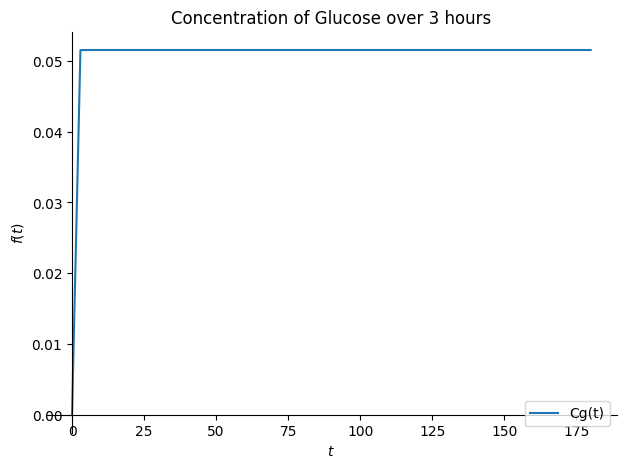

In [ ]:
# to provide a figure over a given amount of time:
''
# extracting the original solution with the same parameters
solution = symb_sol.rhs.subs(par) 

#plotting
graphs = plot(solution,(t,0,180),line_colour='blue',label='Cg(t)', legend=True, show=False)

graphs.title = 'Concentration of Glucose over 3 hours'
graphs.show()

Problem 2: Smith and Campbell Problem 

In [ ]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown #this is to make everything look pretty when displaying the equns


# now we will define the symbols used, include anything except the thing that is in d/dt
m, k, t = symbols("m, k, t",positive=True) 

# definex and y as a function which is the differential equation
x, y = symbols('x, y',cls=Function) 

In [ ]:
#now we will define the first differential equation
# REMEMBER left side of equation (= is ,) and right side 
deqn1 = Eq(m * diff(y(t),t) + k * y(t),0) # remember that y is a function of time so write (t)

deqn2 = Eq(y(t),diff(x(t),t))


print('these are the first order differential equations:')
display(deqn1)
display(deqn2)

these are the first order differential equations:


Eq(k*y(t) + m*Derivative(y(t), t), 0)

Eq(y(t), Derivative(x(t), t))

In [ ]:
# now we will solve for numerical solution = wiht initial params and conditions

init_condit1 = {x(0):0,y(0):50} # initial value of the variables part of a derivative, so x and y 
                                #where x is the position, from position 0, and y from velocity 0 to 50 
par = [(m,500),(k,100)] # parameters, substitute the values given

# now we ask python to solve it for us :) symbollically, aka with parameters and starting contions
symbolic_sol = dsolve((deqn1, deqn2),ics=init_condit1) #
display(Markdown('Symbolic solutions are:'), symbolic_sol[0], symbolic_sol[1]) #aksign to solve symbollically both for diff eq based on position

Symbolic solutions are:

Eq(y(t), 50*exp(-k*t/m))

Eq(x(t), 50*m/k - 50*m*exp(-k*t/m)/k)

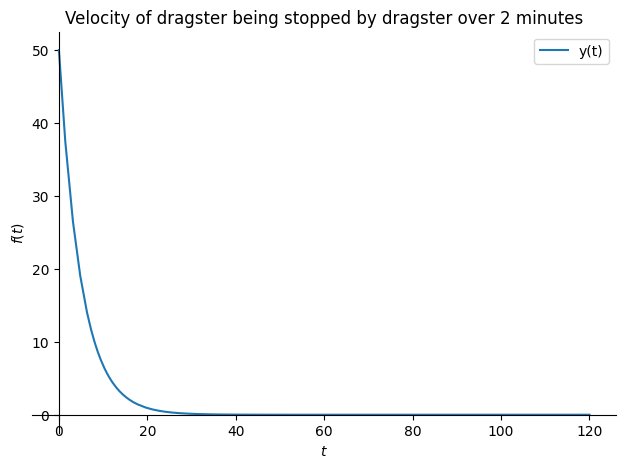

In [ ]:
# now we plot

#extracting the original 2 solutions individually
y_solution = symbolic_sol[0]
x_solution = symbolic_sol[1]

#using the same parameters but only caring about 
#plotting
#TODO: Be aware of the untits of the Y axis, if in minutes or seconds / rhs just means right hand side of eq
graphs = plot(y_solution.rhs.subs(par),(t,0,120),line_colour='blue',label='Cg(t)', legend=True, show=False)
graphs[0].label = 'y(t)'
graphs.title = 'Velocity of dragster being stopped by dragster over 2 minutes'
graphs.show()

In [ ]:
# solve for time when it reaches to a velocity of 1 m/s

# define the equation
time =solve(Eq(y_solution.rhs,1),t)[0] # solving for solution to be 1 for variable t, [0] is just for the first solution that comes up
display(time) 


m*log(50)/k

In [ ]:
# getting a vlaue for the time the dragster reaches 1 m/s

print('Time (s) it takes for dragster to reach 1 m/s:')
time.subs(par).n()  # subs(par) is just substituting the parameter values mentioned before
                    #n() is a numerical approximation for the value calculated 


Time (s) it takes for dragster to reach 1 m/s:


19.5601150271407

In [ ]:
# now we need to find the distance the dragset ha ran overall

print('Disctance (m) dragster runs until it reaches velocity of 1 m/s:')
x_solution.subs(par).evalf(subs={t:19.56})  #evalf, asks to evaluate a floating value (decimal)
                                            #t is being susbtituted with the given time which is the float 

Disctance (m) dragster runs until it reaches velocity of 1 m/s:


Eq(x(19.56), 244.999884971536)

In [535]:
from sympy import * #import main library and functions
from IPython.display import display, Math, Markdown 

# now we will define the symbols used, include anything except the thing that is in d/dt
V1, V2, k, t, Corg, f = symbols("V1, V2, k, t, Corg, f",positive=True) 

# definex and y as a function which is the differential equation
Corg1, Corg2 = symbols('Corg1, Corg2',cls=Function) 


#now we will define the first differential equation
# REMEMBER left side of equation (= is ,) and right side 
deqn1 = Eq(V1 * diff(Corg1(t),t), - k *Corg*V1 - (f*Corg1(t)))

deqn2 = Eq(V2 * diff(Corg2(t),t), - k *Corg*V2 - f*(Corg2(t)-Corg1(t)))


print('these are the differential equations that will be solved for T1 and T2:')
display(deqn1)
display(deqn2)



these are the differential equations that will be solved for T1 and T2:


Eq(V1*Derivative(Corg1(t), t), -Corg*V1*k - f*Corg1(t))

Eq(V2*Derivative(Corg2(t), t), -Corg*V2*k - f*(-Corg1(t) + Corg2(t)))

In [558]:
# Solving for both tanks 
params = {
    (f,125), #
    (V1,250), #
    (V2, 125), #
    (k, 1.5), #
}

init_condit1 = {Corg1(0):50, Corg2(0):50} # g/l  initial value 

symbolic_solution = dsolve((deqn1.subs(params),deqn2.subs(params)), ics=init_condit1)
display(Markdown('Numerical solutions for T1 and T2 are:'), symbolic_solution[0],symbolic_solution[1])

anal_sol = dsolve(deqn1)
print ('this is the analytical solution for Tank 1:')
display(anal_sol)

print ('this is the analytical solution for Tank 2:')
anal_sol2 = dsolve(deqn2)
display(anal_sol2)


# now we ask python to solve it for us :) 
some_sol = dsolve((deqn1, deqn2),ics=init_condit1) #
display(Markdown('Some solutions using only initial conditions for T1 and T2 are:'), some_sol[0], some_sol[1]) 

Symbolic solutions for T1 and T2 are:

Eq(Corg1(t), -3.0*Corg + (3.0*Corg + 50.0)*exp(-0.5*t))

Eq(Corg2(t), -4.5*Corg - (1.5*Corg + 50.0)*exp(-1.0*t) + (6.0*Corg + 100.0)*exp(-0.5*t))

this is the analytical solution for Tank 1:


Eq(Corg1(t), C1*exp(-f*t/V1) - Corg*V1*k/f)

this is the analytical solution for Tank 2:


Eq((-Corg*V2**2*k*exp(f*t/V2)/f + f*Integral(Corg1(t)*exp(f*t/V2), t) - f*Integral(Corg2(t)*exp(f*t/V2), t))/V2, C1)

Some solutions using only initial conditions for T1 and T2 are:

Eq(Corg1(t), -Corg*V1*k/f + (Corg*V1**2*k + 50*V1*f - V2*(Corg*V1*k + 50*f))*exp(-f*t/V1)/(f*(V1 - V2)))

Eq(Corg2(t), -Corg*k*(V1**2 - V2**2)/(f*(V1 - V2)) + V1*(Corg*V1*k + 50*f)*exp(-f*t/V1)/(f*(V1 - V2)) - V2*(Corg*V2*k + 50*f)*exp(-f*t/V2)/(f*(V1 - V2)))

In [555]:
# now we plot

Corg1_sol=symbolic_solution[0].rhs.subs(par)
Corg2_sol=symbolic_solution[1].rhs.subs(par)

#plotting

graphs = plot(Corg1_solution,Corg2_solution,(t,0,300),legend=True,show=False)
graphs[0].label = 'corg1(t)'
graphs[1].label = 'corg2(t)'
graphs.title = 'Concentration of A vs time'
graphs.show()

ValueError: The same variable should be used in all univariate expressions being plotted.